In [77]:
# useful link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
import pandas as pd
import random 
import numpy as np

new_test=pd.read_csv('validation_set.csv')

all_values = random.sample(new_test.values.tolist(),len(new_test))
all_train = random.sample(all_values,int(len(all_values)*.8))
all_test = [n for n in all_values if n not in all_train]

# y contains the label column
# replace n[13] with the correct column index
y_train = [n[13] for n in all_train]
y_test = [n[13] for n in all_test]

# x contains the features/scores
# replace n[2:6]+n[9:10] with the correct column index
X_train = [n[2:6]+n[9:10] for n in all_train]
X_test = [n[2:6]+n[9:10] for n in all_test]

#this is the most important step - calculation of log reg and y-predicted
clf = LogisticRegression(random_state=1234).fit(X_train, y_train)
y_predicted = [n[1] for n in clf.predict_proba(X_test)]

#---------------------------------------------------------------------------------------------------------------------
# everything below might not be relevant to the cross-validation that you are attempting 
# it is basically an attempt to optimize recall and precision
 
average_precision = average_precision_score(y_test, y_predicted)
precision, recall, _ = precision_recall_curve(y_test, y_predicted)
ix = 0

recall_dict={}
precisions=[]
at_recall=[]

#this is for boot-straping
for n in range(len(recall)-1):
    x = np.round(_[n],2)

    if x in recall_dict.keys():
        recall_dict[x]['precision'].append(precision[n])
        recall_dict[x]['recall'].append(recall[n])
    else:
        recall_dict[x] = {'precision' : [precision[n]], 'recall' : [recall[n]]}

for n in recall:

    if n<.8:
        ix = list(recall).index(n) - 1
        break

at_recall.append(precision[ix])

precisions.append(average_precision)

[0.95215661 0.9564494  0.95866037 0.96210218 0.96482754 0.96592636
 0.96771583 0.96804553 0.96990286 0.97150699 0.9722807  0.97237237
 0.97384108 0.97548137 0.97667955 0.97786158 0.97820596 0.97831204
 0.97900593 0.97960306 0.97986287 0.97999752 0.98003757 0.98122073
 0.98178833 0.98193032 0.98222211 0.98244319 0.98348547 0.98376576
 0.98489679 0.98493705 0.98530678 0.98536082 0.98550214 0.98555093
 0.98712224 0.98796614 0.98802831 0.98817055 0.98823102 0.98834674
 0.98851006 0.98864239 0.98895182 0.98993277 0.99034353 0.99070331
 0.99088026 0.99184981 0.99211248 0.99249059 0.99263584 0.99267124
 0.99396278 0.9939723  0.99539397 0.9957984 ]


1.0
0.9568965517241379
0.8534482758620691
0.6206896551724137
0.25000000000000006
0.02586206896551724


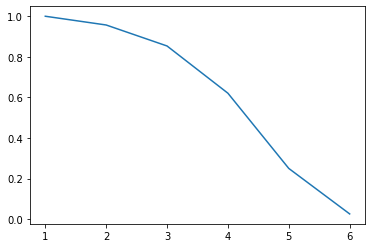

In [83]:
import matplotlib.pyplot as plt
mean_recall=[]

for i in recall_dict.keys():
    rec= recall_dict[i]['recall']

    if len(rec)>1:
        avrg=sum(rec)/len(rec)
        print(avrg)
    else:
        avrg=rec[0]
        print(avrg)
    
    mean_recall.append(avrg)

x=[1,2,3,4,5,6]

plt.plot(x,mean_recall)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


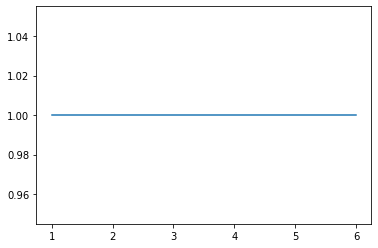

In [85]:
import matplotlib.pyplot as plt

mean_precision=[]


for i in recall_dict.keys():
    rec= recall_dict[i]['precision']
    
    if len(rec)>1:
        avrg=sum(rec)/len(rec)

    else:
        avrg=rec[0]

    
    mean_precision.append(avrg)


print(mean_precision)


x=[1,2,3,4,5,6]

plt.plot(x,mean_precision)


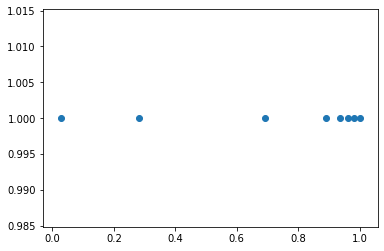

In [76]:
import matplotlib.pyplot as plt

plt.scatter(mean_recall, mean_precision)